# Step 1: Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

import tensorflow_datasets as tfds
from keras import layers, models
from keras.layers import Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

import warnings
warnings.filterwarnings('ignore')

# Step 2: Loading Data

In [ ]:
(train_data, test_data), metadata = tfds.load(
    'cifar100',
    split=['train', 'test'],
    with_info=True,
    as_supervised=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar100/incomplete.Z3CCGN_3.0.2/cifar100-train.tfrecord*...:   0%|       …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar100/incomplete.Z3CCGN_3.0.2/cifar100-test.tfrecord*...:   0%|        …

Dataset cifar100 downloaded and prepared to /root/tensorflow_datasets/cifar100/3.0.2. Subsequent calls will reuse this data.


In [ ]:
# Load the CIFAR-100 dataset from TensorFlow Datasets
#(train_data, val_data, test_data), metadata = tfds.load(
 #   'cifar100',
 #   split=('train[:80%]', 'train[80%:90%]', 'train[90%:]'),
 #   with_info=True,
 #   as_supervised=True,
#)

In [ ]:
type(train_data)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [ ]:
train_data.take(1)  # retrieves the first element (or batch) from the dataset

<_TakeDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

# View the data

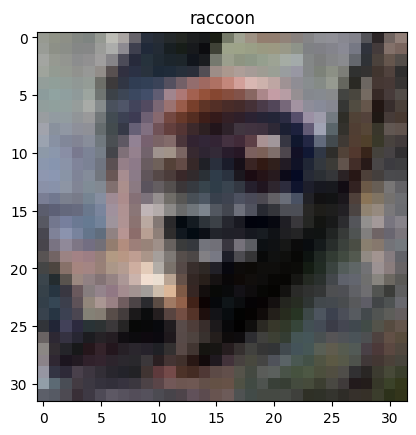

In [ ]:
image, label = next(iter(train_data.take(1)))
plt.imshow(image)
label_name = metadata.features['label'].int2str(label)
plt.title(label_name)
plt.show()

tf.Tensor(66, shape=(), dtype=int64)


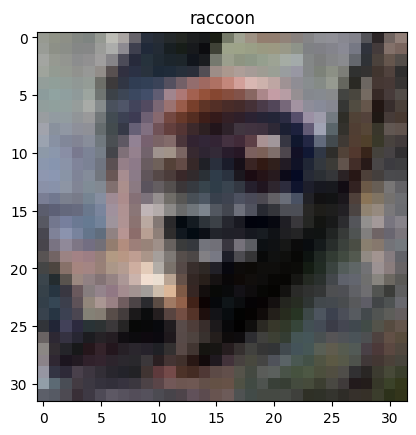

In [ ]:
image, label = next(iter(train_data))
plt.imshow(image)
label_name = metadata.features['label'].int2str(label)
# plt.title(str(label.numpy()))
print(label)
plt.title(label_name)
plt.show()

(32, 32, 3)
tf.Tensor(66, shape=(), dtype=int64)
(32, 32, 3)
tf.Tensor(23, shape=(), dtype=int64)
(32, 32, 3)
tf.Tensor(40, shape=(), dtype=int64)


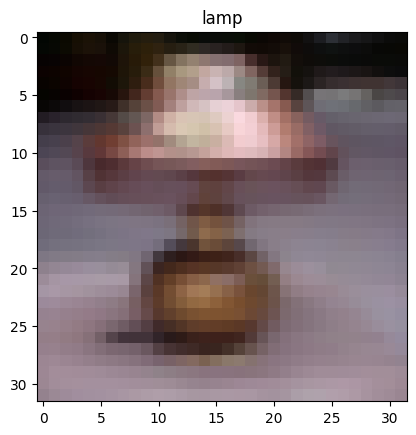

In [ ]:
for image, label in iter(train_data.take(3)):
  print(image.shape)
  print(label)
  plt.imshow(image)
  label_name = metadata.features['label']. int2str(label)
  plt.title(label_name)
  plt.imshow(image)

In [ ]:
images, labels = [], []            # Extract 5 samples from train_data for visualization
for image, label in train_data.take(5):
    print(image.shape)
    print(label)
    label_name = metadata.features['label'].int2str(label)
    print(label_name)
    images.append(image)
    labels.append(label_name)

(32, 32, 3)
tf.Tensor(66, shape=(), dtype=int64)
raccoon
(32, 32, 3)
tf.Tensor(23, shape=(), dtype=int64)
cloud
(32, 32, 3)
tf.Tensor(40, shape=(), dtype=int64)
lamp
(32, 32, 3)
tf.Tensor(39, shape=(), dtype=int64)
keyboard
(32, 32, 3)
tf.Tensor(7, shape=(), dtype=int64)
beetle


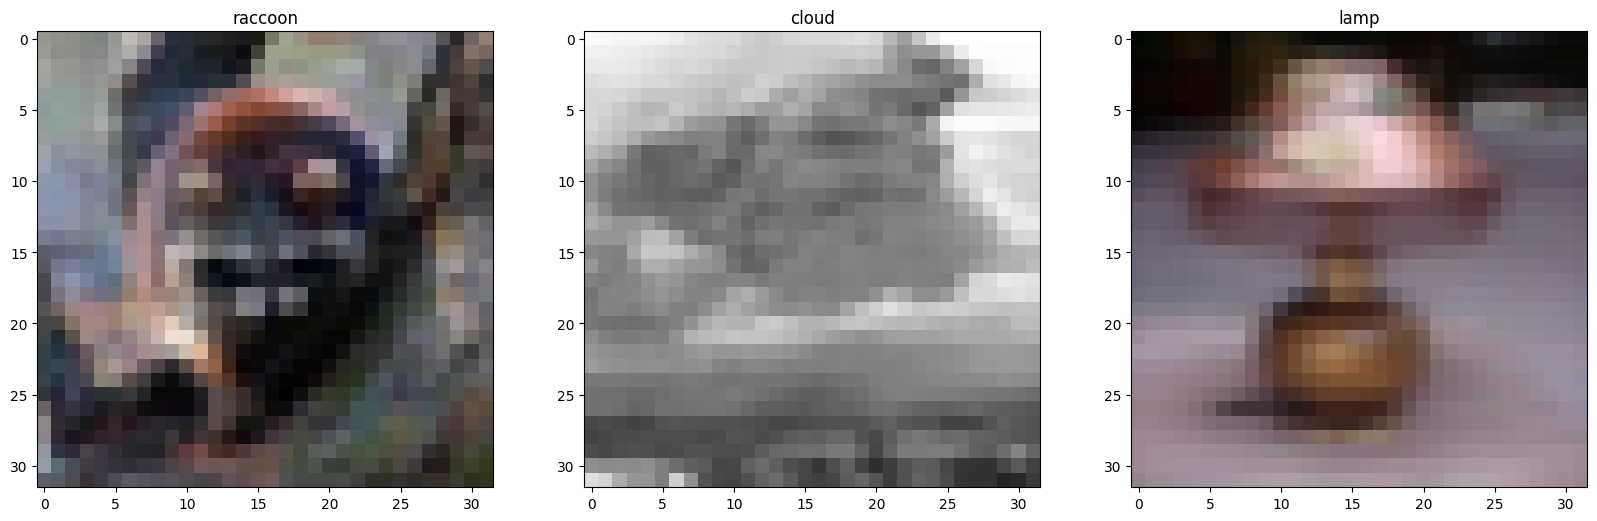

In [ ]:
# Plot the extracted images
fig, ax = plt.subplots(1, 3, figsize=(20, 20))
for i in range(3):        # This code snippet creates a visualization of three images along with their respective labels using Matplotlib.
    ax[i].imshow(images[i])
    ax[i].set_title(labels[i])
plt.show()

# Step 3: Basic Preprocessing

In [ ]:
IMG_SIZE = 32
resize_rescale = tf.keras.Sequential([
    layers.Resizing(IMG_SIZE, IMG_SIZE),  # Ensure consistent size (CIFAR-100 images are already 32x32)
    layers.Rescaling(1.0 / 255)           # Normalize pixel values to [0, 1]
])

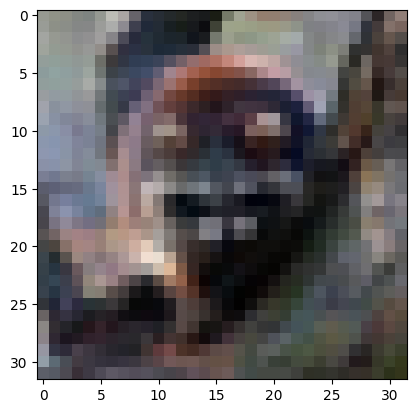

In [ ]:
result = resize_rescale(images[0])
plt.imshow(result)
plt.show()

# Step 4: Data Augmentation

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),  # Flip horizontally and vertically
    layers.RandomRotation(0.2),                    # Random rotation
    layers.RandomZoom(0.2)                         # Random zoom
])

In [ ]:
images[0]   # it refers to accessing the first element of a list or array named images.

<tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[151, 154, 145],
        [144, 147, 135],
        [141, 143, 134],
        ...,
        [ 44,  38,  39],
        [112, 100,  96],
        [145, 127, 120]],

       [[153, 156, 150],
        [141, 144, 135],
        [139, 142, 136],
        ...,
        [ 68,  59,  59],
        [131, 113, 106],
        [121, 101,  94]],

       [[163, 165, 161],
        [150, 153, 145],
        [147, 149, 144],
        ...,
        [ 75,  66,  60],
        [101,  86,  77],
        [ 83,  77,  73]],

       ...,

       [[150, 150, 162],
        [ 51,  52,  67],
        [ 46,  42,  56],
        ...,
        [ 60,  59,  48],
        [ 71,  73,  56],
        [ 58,  62,  44]],

       [[146, 158, 168],
        [ 92, 106, 116],
        [ 73,  77,  85],
        ...,
        [ 54,  55,  40],
        [ 59,  66,  41],
        [ 52,  56,  28]],

       [[ 92,  95, 105],
        [ 86,  90, 100],
        [ 77,  74,  82],
        ...,
        [ 59,  61,  44]

In [ ]:
augmented_image = (images[0])

In [ ]:
# Combine preprocessing and augmentation
def preprocess(image, label):
    image = resize_rescale(image)
    image = data_augmentation(image)
    return image, label

In [ ]:
processing = tf.keras.Sequential([
    resize_rescale,
    data_augmentation
])
processing

<Sequential name=sequential_2, built=True>

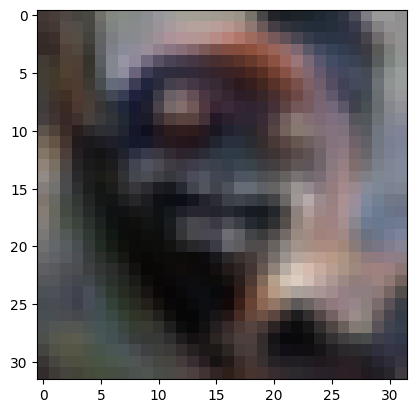

In [ ]:
r = processing(images[0])
plt.imshow(r)

# Build the model

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),  # Applies 64 filters of size 3x3 for deeper feature extraction.
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(100, activation='softmax')  # 100 classes in CIFAR-100
])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │           6,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,420 (501.64 KB)

 Trainable params: 128,420 (501.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
BATCH_SIZE = 32

# Apply preprocessing to datasets
train_dataset = (
    train_data
    .map(preprocess, num_parallel_calls=AUTOTUNE)
    .shuffle(buffer_size=10000)
    .batch(BATCH_SIZE)
    .prefetch(buffer_size=AUTOTUNE)
)

test_dataset = (
    test_data
    .map(lambda x, y: (resize_rescale(x), y), num_parallel_calls=AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(buffer_size=AUTOTUNE)
)

In [ ]:
model.compile(optimizer='adam',  # (Adaptive Moment Estimation).
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
EPOCHS = 5
history = model.fit(
    train_dataset,
    epochs=EPOCHS,)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 33ms/step - accuracy: 0.0298 - loss: 4.3845
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 27ms/step - accuracy: 0.1008 - loss: 3.8702
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.1415 - loss: 3.6256
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 36ms/step - accuracy: 0.1605 - loss: 3.4987
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 29ms/step - accuracy: 0.1752 - loss: 3.4230


In [ ]:
loss, acc = model.evaluate(test_dataset)
print(f"Test Loss: {loss}, Test Accuracy: {acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.1902 - loss: 3.3816
Test Loss: 3.3885183334350586, Test Accuracy: 0.19110000133514404


In [ ]:
# evaluate the set
#acc, loss = model.evaluate(test_dataset) # Changed test_data to test_dataset
#acc, loss

# Without Data Augmentation

In [ ]:
(train_data, test_data), metadata = tfds.load(
    'cifar100',
    split=['train', 'test'],
    with_info=True,
    as_supervised=True
)

In [ ]:
# Get class names
class_names = metadata.features['label'].names
print("Class Names:", class_names)

Class Names: ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', '

In [ ]:
IMG_SIZE = 32  # CIFAR-100 images are 32x32 by default

def preprocess(image, label):
    # Normalize pixel values to [0, 1]
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Apply preprocessing to datasets
train_data = train_data.map(preprocess).cache().prefetch(tf.data.AUTOTUNE)
test_data = test_data.map(preprocess).cache().prefetch(tf.data.AUTOTUNE)

In [ ]:
val_split = 0.2
train_size = int((1 - val_split) * metadata.splits['train'].num_examples)

train_data = train_data.take(train_size)  # Take the first 80% for training
val_data = train_data.skip(train_size)   # Skip the first 80% to create validation data


In [ ]:
BATCH_SIZE = 32

train_data = train_data.batch(BATCH_SIZE).cache().prefetch(tf.data.AUTOTUNE)
val_data = val_data.batch(BATCH_SIZE).cache().prefetch(tf.data.AUTOTUNE)
test_data = test_data.batch(BATCH_SIZE).cache().prefetch(tf.data.AUTOTUNE)

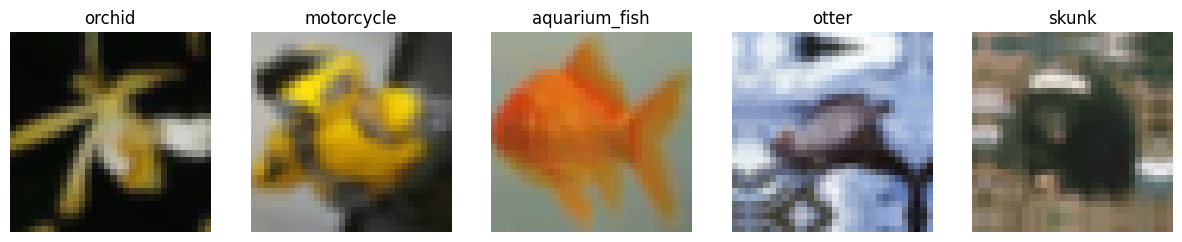

In [ ]:
# Visualize a few images from the training dataset
images, labels = next(iter(train_dataset.take(1)))
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.set_title(class_names[labels[i].numpy()])
    ax.axis('off')
plt.show()

# Build the Model

In [ ]:
NUM_CLASSES = 100

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 368,420 (1.41 MB)

 Trainable params: 368,420 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

# Compile , Train & Evaluate

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
EPOCHS = 10

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.0284 - loss: 4.4230
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1022 - loss: 3.8604
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1519 - loss: 3.5531
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1868 - loss: 3.3742
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2099 - loss: 3.2409
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2282 - loss: 3.1228
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2457 - loss: 3.0298
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2597 - loss: 2.9545
Epoch 9/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2750 - loss: 2.8747
Epoch 10/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2839 - loss: 2.8180


In [ ]:
loss, acc = model.evaluate(test_dataset)
print(f"Test Loss: {loss}, Test Accuracy: {acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2984 - loss: 2.8033
Test Loss: 2.797696352005005, Test Accuracy: 0.30169999599456787


# Reading Data From Folder - Train / Validation / Testing folder

In [ ]:
import tensorflow as tf
import pathlib

dataset_url =   "https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz"    # CIFAR-100 dataset URL
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)   # Download and extract the dataset
data_dir = pathlib.Path(archive).with_suffix('')        # Get the path to the extracted directory

#  load the CIFAR-10 dataset
cifar10 = tf.keras.datasets.cifar10

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
!ls /root/.keras/datasets/cifar-100-python

file.txt~  meta  test  train
